# Pyber Challenge

In [412]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [413]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [414]:
# 1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [415]:
# 2. Get the total drivers for each city type
driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [416]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [417]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fare / ride_count
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [418]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare / driver_count
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [419]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
        "Total Rides": ride_count,
        "Total Drivers": driver_count,
        "Total Fares": total_fare,
        "Average Fare per Ride": avg_fare_per_ride,
        "Average Fare per Driver": avg_fare_per_driver})
      
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [420]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [421]:
#  8. Format the columns
pyber_summary_df.style.format({"Total Fares": "${:,.2f}",
                               "Average Fare per Ride": "${:,.2f}",
                               "Average Fare per Driver": "${:,.2f}"})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [423]:
# 1. Read the merged DataFrame
new_pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
new_pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [424]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
fares_by_date_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
fares_by_date_df.head()

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75


In [425]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_df = fares_by_date_df.reset_index()

In [426]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
fares_by_date_pivot = fares_by_date_df.pivot(index='date', columns='type', values='fare')
fares_by_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [427]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_date_jan19_apr19 = fares_by_date_pivot.loc['2019-01-01':'2019-04-29']
fares_by_date_jan19_apr19.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [428]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_by_date_jan19_apr19.index=pd.to_datetime(fares_by_date_jan19_apr19.index)

In [429]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date_jan19_apr19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [430]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_jan19_apr19_df = fares_by_date_jan19_apr19.resample('W').sum()
weekly_fares_jan19_apr19_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


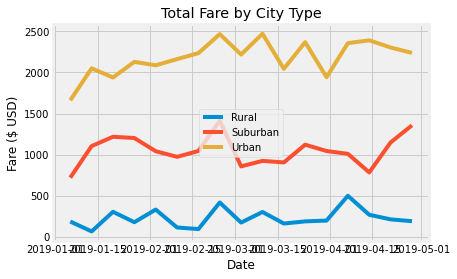

In [431]:
#### 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Import the style from Matplotlib.
from matplotlib import style

fig, ax = plt.subplots()
ax.plot(weekly_fares_jan19_apr19_df)
ax.set(xlabel='Date', ylabel='Fare ($ USD)', title='Total Fare by City Type')
ax.legend(weekly_fares_jan19_apr19_df)
plt.style.use('fivethirtyeight')

fig.savefig("PyBer_fare_summary.png")
plt.show()